In [1]:
import glob
import os
import numpy as np
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots
import seaborn as sns

plt.style.use(["science", "no-latex"])
my_style = {
    "text.usetex": False,
    "figure.constrained_layout.use": True,
    "figure.autolayout": False,
    "savefig.bbox": "tight",
    "savefig.pad_inches": 0.015,
    "font.size": 14,
    "axes.labelsize": 14,
    "legend.fontsize": 8,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "axes.titlesize": 14,
}
plt.rcParams.update(my_style)

In [2]:
def read_csv_files(file_pattern):
    all_data = []
    for file in glob.glob(file_pattern):
        dataset_name = os.path.basename(os.path.dirname(file)).split("_")[0]
        df = pd.read_csv(file, header=[0, 1], index_col=[0, 1]).round(2)
        # Query existing levels
        current_levels = list(df.index.names)
        df["Dataset"] = dataset_name  # Add a new column with constant value
        df = df.set_index("Dataset", append=True)
        df = df.reorder_levels(["Dataset"] + current_levels)
        all_data.append(df)

    return pd.concat(all_data).sort_index()

In [3]:
experiment = "experiments_64x64_2"
formatted_df = read_csv_files(f"{experiment}/*/classification_metrics_*.csv")
formatted_df.columns.set_names("Method", level=1, inplace=True)
formatted_df.rename(columns={"PCA": "PCA"}, level=1, inplace=True)
formatted_df = formatted_df[formatted_df.index.get_level_values('Classifier') != 'Gaussian Naive Bayes']
formatted_df

Accuracy       Precision       Recall  \
Method                                     PCA POLCA       PCA POLCA    PCA   
Dataset     Classifier          Split                                         
bloodmnist  Linear SVM          Test      0.66  0.68      0.66  0.71   0.66   
                                Train     0.67  0.67      0.67  0.68   0.67   
            Logistic Regression Test      0.65  0.69      0.65  0.69   0.65   
                                Train     0.65  0.67      0.65  0.67   0.65   
            Perceptron          Test      0.46  0.47      0.47  0.51   0.46   
...                                        ...   ...       ...   ...    ...   
retinamnist Logistic Regression Train     0.50  0.51      0.47  0.47   0.50   
            Perceptron          Test      0.46  0.48      0.39  0.43   0.46   
                                Train     0.47  0.47      0.38  0.43   0.47   
            Ridge Classifier    Test      0.48  0.52      0.43  0.49   0.48   
                                Train     0.48  0.50      0.43  0.46   0.48   

                                            F1-Score        
Method                                POLCA      PCA POLCA  
Dataset     Classifier          Split                       
bloodmnist  Linear SVM          Test   0.68     0.65  0.67  
                                Train  0.67     0.65  0.65  
            Logistic Regression Test   0.69     0.65  0.69  
                                Train  0.67     0.64  0.67  
            Perceptron          Test   0.47     0.46  0.46  
...                                     ...      ...   ...  
retinamnist Logistic Regression Train  0.51     0.44  0.46  
            Perceptron          Test   0.48     0.36  0.44  
                                Train  0.47     0.38  0.44  
            Ridge Classifier    Test   0.52     0.39  0.44  
                                Train  0.50     0.40  0.44  

[104 rows x 8 columns]

In [4]:
# Generate LaTeX table
def mean_with_std_error(x):
    mean = x.mean()
    std_error = x.std() / np.sqrt(len(x))
    return f"{mean:.2f}±{std_error:.2f}"


# Group by 'Dataset' and 'Split', then apply the custom function
df_aggregated = formatted_df.groupby(level=["Dataset", "Split"]).mean().round(2)# .agg(mean_with_std_error)
display(df_aggregated)
latex_table = df_aggregated.to_latex(
    multirow=True,
    multicolumn=True,
    caption="Classification Metrics Averaged across all Datasets",
    label="tab:classifier_metric_comparison",
    position="htbp",
    float_format="%.2f",
    column_format="llrrrrrr",
)
print(latex_table)
# with open("experiments/classifier_metric_comparison.tex", "w") as f:
#     f.write(latex_table)

Accuracy       Precision       Recall       F1-Score  \
Method                    PCA POLCA       PCA POLCA    PCA POLCA      PCA   
Dataset        Split                                                        
bloodmnist     Test      0.57  0.60      0.57  0.62   0.57  0.60     0.56   
               Train     0.57  0.59      0.57  0.60   0.57  0.59     0.55   
breastmnist    Test      0.74  0.75      0.76  0.73   0.74  0.75     0.71   
               Train     0.74  0.74      0.74  0.71   0.74  0.74     0.71   
chestmnist     Test      0.48  0.46      0.11  0.46   0.02  0.04     0.02   
               Train     0.50  0.46      0.16  0.21   0.02  0.04     0.02   
dermamnist     Test      0.64  0.67      0.61  0.59   0.64  0.67     0.56   
               Train     0.64  0.66      0.59  0.58   0.64  0.66     0.55   
fmnist         Test      0.69  0.74      0.67  0.73   0.69  0.74     0.67   
               Train     0.70  0.75      0.68  0.74   0.70  0.75     0.67   
mnist          Test      0.77  0.94      0.78  0.94   0.77  0.94     0.76   
               Train     0.76  0.94      0.77  0.94   0.76  0.94     0.75   
octmnist       Test      0.29  0.37      0.31  0.37   0.29  0.37     0.19   
               Train     0.48  0.52      0.48  0.52   0.48  0.52     0.41   
organamnist    Test      0.51  0.56      0.52  0.61   0.51  0.56     0.49   
               Train     0.56  0.64      0.58  0.66   0.56  0.64     0.55   
organcmnist    Test      0.54  0.64      0.55  0.68   0.54  0.64     0.51   
               Train     0.59  0.70      0.61  0.73   0.59  0.70     0.56   
organsmnist    Test      0.36  0.38      0.34  0.41   0.36  0.38     0.31   
               Train     0.40  0.42      0.38  0.45   0.40  0.42     0.34   
pathmnist      Test      0.47  0.46      0.50  0.46   0.47  0.46     0.42   
               Train     0.43  0.46      0.44  0.43   0.43  0.46     0.38   
pneumoniamnist Test      0.80  0.78      0.81  0.80   0.80  0.78     0.79   
               Train     0.91  0.93      0.92  0.94   0.91  0.93     0.92   
retinamnist    Test      0.48  0.51      0.43  0.46   0.48  0.51     0.40   
               Train     0.49  0.50      0.44  0.48   0.49  0.50     0.41   

                            
Method               POLCA  
Dataset        Split        
bloodmnist     Test   0.58  
               Train  0.57  
breastmnist    Test   0.66  
               Train  0.67  
chestmnist     Test   0.02  
               Train  0.03  
dermamnist     Test   0.55  
               Train  0.56  
fmnist         Test   0.72  
               Train  0.73  
mnist          Test   0.94  
               Train  0.94  
octmnist       Test   0.26  
               Train  0.46  
organamnist    Test   0.56  
               Train  0.62  
organcmnist    Test   0.64  
               Train  0.69  
organsmnist    Test   0.34  
               Train  0.38  
pathmnist      Test   0.44  
               Train  0.42  
pneumoniamnist Test   0.76  
               Train  0.93  
retinamnist    Test   0.45  
               Train  0.45

\begin{table}[htbp]
\caption{Classification Metrics Averaged across all Datasets}
\label{tab:classifier_metric_comparison}
\begin{tabular}{llrrrrrr}
\toprule
 &  & \multicolumn{2}{r}{Accuracy} & \multicolumn{2}{r}{Precision} & \multicolumn{2}{r}{Recall} & \multicolumn{2}{r}{F1-Score} \\
 & Method & PCA & POLCA & PCA & POLCA & PCA & POLCA & PCA & POLCA \\
Dataset & Split &  &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{2}{*}{bloodmnist} & Test & 0.57 & 0.60 & 0.57 & 0.62 & 0.57 & 0.60 & 0.56 & 0.58 \\
 & Train & 0.57 & 0.59 & 0.57 & 0.60 & 0.57 & 0.59 & 0.55 & 0.57 \\
\cline{1-10}
\multirow[t]{2}{*}{breastmnist} & Test & 0.74 & 0.75 & 0.76 & 0.73 & 0.74 & 0.75 & 0.71 & 0.66 \\
 & Train & 0.74 & 0.74 & 0.74 & 0.71 & 0.74 & 0.74 & 0.71 & 0.67 \\
\cline{1-10}
\multirow[t]{2}{*}{chestmnist} & Test & 0.48 & 0.46 & 0.11 & 0.46 & 0.02 & 0.04 & 0.02 & 0.02 \\
 & Train & 0.50 & 0.46 & 0.16 & 0.21 & 0.02 & 0.04 & 0.02 & 0.03 \\
\cline{1-10}
\multirow[t]{2}{*}{dermamnist} & Test & 0.64 & 0.67 & 0.

In [5]:
# Reshape the DataFrame to long format
df_long = (
    formatted_df.stack(level=[0, 1], future_stack=True)
    .reset_index()
    .rename(columns={"level_3": "Metric", "level_4": "Method", 0: "Value"})
)
df_long

,Dataset,Classifier,Split,Metric,Method,Value
0,bloodmnist,Linear SVM,Test,Accuracy,PCA,0.66
1,bloodmnist,Linear SVM,Test,Accuracy,POLCA,0.68
2,bloodmnist,Linear SVM,Test,Precision,PCA,0.66
3,bloodmnist,Linear SVM,Test,Precision,POLCA,0.71
4,bloodmnist,Linear SVM,Test,Recall,PCA,0.66
...,...,...,...,...,...,...
827,retinamnist,Ridge Classifier,Train,Precision,POLCA,0.46
828,retinamnist,Ridge Classifier,Train,Recall,PCA,0.48
829,retinamnist,Ridge Classifier,Train,Recall,POLCA,0.50
830,retinamnist,Ridge Classifier,Train,F1-Score,PCA,0.40


In [6]:
df_long = pd.DataFrame(df_long[df_long["Metric"] == "Accuracy"].copy())
df_long

,Dataset,Classifier,Split,Metric,Method,Value
0,bloodmnist,Linear SVM,Test,Accuracy,PCA,0.66
1,bloodmnist,Linear SVM,Test,Accuracy,POLCA,0.68
8,bloodmnist,Linear SVM,Train,Accuracy,PCA,0.67
9,bloodmnist,Linear SVM,Train,Accuracy,POLCA,0.67
16,bloodmnist,Logistic Regression,Test,Accuracy,PCA,0.65
...,...,...,...,...,...,...
809,retinamnist,Perceptron,Train,Accuracy,POLCA,0.47
816,retinamnist,Ridge Classifier,Test,Accuracy,PCA,0.48
817,retinamnist,Ridge Classifier,Test,Accuracy,POLCA,0.52
824,retinamnist,Ridge Classifier,Train,Accuracy,PCA,0.48


In [7]:
classifier_means = df_long.groupby("Classifier")["Value"].mean().sort_values(ascending=True)
classifier_ranks = {classifier: rank for rank, classifier in enumerate(classifier_means.index)}
df_sorted = df_long.sort_values(
    by=["Classifier", "Method"], key=lambda x: x.map(classifier_ranks) if x.name == "Classifier" else x
)
df_sorted = df_sorted.reset_index(drop=True)
df_sorted

,Dataset,Classifier,Split,Metric,Method,Value
0,bloodmnist,Perceptron,Test,Accuracy,PCA,0.46
1,bloodmnist,Perceptron,Train,Accuracy,PCA,0.46
2,breastmnist,Perceptron,Test,Accuracy,PCA,0.63
3,breastmnist,Perceptron,Train,Accuracy,PCA,0.64
4,chestmnist,Perceptron,Test,Accuracy,PCA,0.35
...,...,...,...,...,...,...
203,pathmnist,Linear SVM,Train,Accuracy,POLCA,0.54
204,pneumoniamnist,Linear SVM,Test,Accuracy,POLCA,0.78
205,pneumoniamnist,Linear SVM,Train,Accuracy,POLCA,0.94
206,retinamnist,Linear SVM,Test,Accuracy,POLCA,0.52


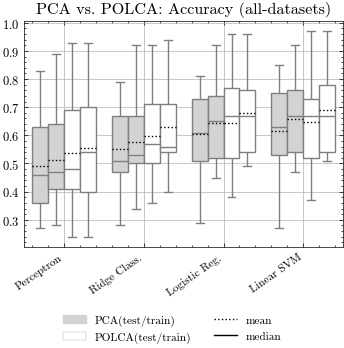

In [8]:
df = df_sorted.copy()
df["Method"] = df["Method"] + "-" + df["Split"]
fig, ax = plt.subplots(figsize=(3.5, 3.5))
sns.boxplot(       
    data=df,
    x="Classifier",
    y="Value",
    hue="Method",
    fill=True,
    palette=["lightgray", "lightgray", "white", "white"],   
    showmeans=True,
    meanprops={"ls": ":", "c": "k"},
    meanline=True,
    showfliers=False,
    fliersize=0.5,
)
plt.xlabel("")
# ax.set_ylabel("Accuary across all datasets", fontsize="small")
ax.set_ylabel(None)
ax.set_xticks(range(len(df.Classifier.unique())))
ax.legend([])
tlabels = [t.get_text() for t in ax.get_xticklabels()]
# tlabels[tlabels.index("Gaussian Naive Bayes")] = "Gauss. NB"
tlabels[tlabels.index("Logistic Regression")] = "Logistic Reg."
tlabels[tlabels.index("Ridge Classifier")] = "Ridge Class."
ax.set_xticklabels(tlabels, rotation=35, ha="right", fontsize="xx-small")
ax.set_title("PCA vs. POLCA: Accuracy (all-datasets)", fontsize="small")
ax.grid()
PCA_patch = mpatches.Patch(
    color="lightgray",
    label="PCA(test/train)",
)
POLCA_patch = mpatches.Patch(
    facecolor="white",
    label="POLCA(test/train)",
    edgecolor="k",
    lw=0.1,
)
means_leg = mlines.Line2D(
    [],
    [],
    ls=":",
    color="k",
    marker=None,
    markersize=15,
    label="mean",
)
median_leg = mlines.Line2D(
    [],
    [],
    ls="-",
    color="k",
    marker=None,
    markersize=15,
    label="median",
)
fig.legend(
    handles=[PCA_patch, POLCA_patch, means_leg,median_leg],
    loc="outside lower center",
    fontsize="xx-small",
    ncols=2,
    borderaxespad=0.0,
)

# plt.legend(loc="outside upper center")
# Tweak the visual presentation
# sns.despine(trim=False, left=True, right=True, top=True, bottom=True)
plt.savefig(f"{experiment}/classifier_metric_comparison_boxplot_methods.pdf", dpi=300, bbox_inches="tight")